<a href="https://colab.research.google.com/github/dfebriyanto/Tugas1VisDataSeabon/blob/main/Tugas3MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd  #distribution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf
from scipy.stats import norm

In [5]:
pip install empiricaldist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12122 sha256=7becdf0c6b63f1b43c9998a945d0755f55d9b20b72d561b5a6e9b4c6434282d5
  Stored in directory: /root/.cache/pip/wheels/c2/2f/73/700abc644ee5aba92a8b40552794103c445cd47fcdfe7828f7
Successfully built empiricaldist


In [6]:
pip install tables

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
gss = pd.read_hdf('gss.hdf5', 'gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [9]:
year = gss['year']
# Compute the PMF for year
pmf_year = Pmf.from_seq(year, normalize=False)

# Print the result
print(pmf_year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: , dtype: int64


Text(0, 0.5, 'PMF')

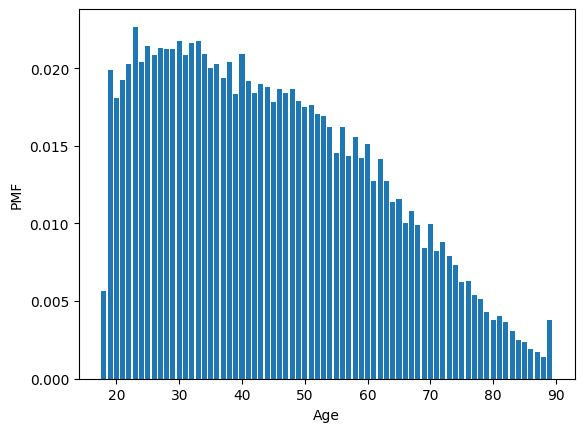

In [10]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')

In [11]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf.from_seq(age)

# Calculate the CDF of 30
print(cdf_age(30))
print(1 - cdf_age(30))

0.2539137136526389
0.7460862863473612


In [12]:
income = gss['realinc']

cdf_income = Cdf.from_seq(income)

In [13]:
# Calculate the 75th percentile
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


Text(0, 0.5, 'CDF')

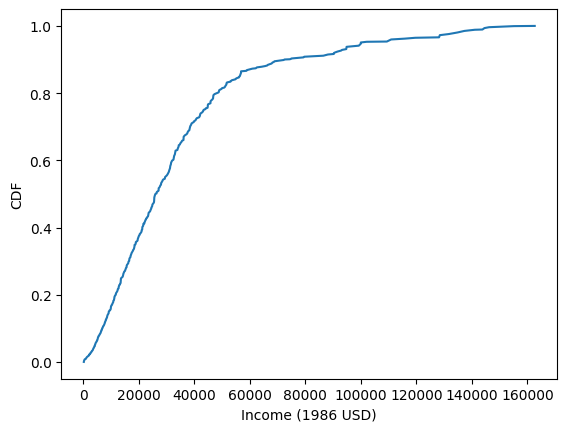

In [14]:
# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')

In [15]:
# Select educ
educ = gss['educ']

# Bachelor`s degree
bach = (educ >= 16)

# Associate degree
assc = ((educ >= 14) & (educ < 16))

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


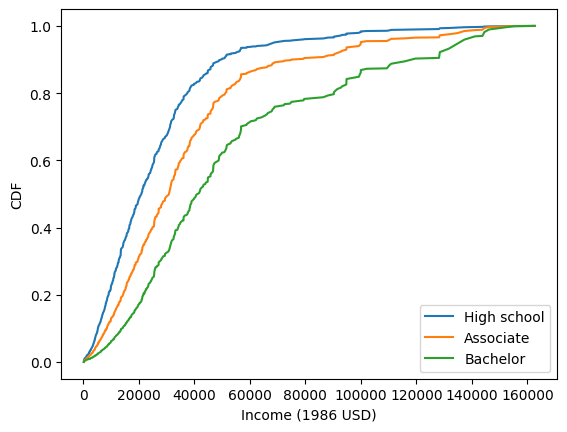

In [16]:
income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()

In [17]:
# Extract realinc and compute its log
log_income = np.log10(income)

# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
dist = norm(mean, std)

4.371148677934171 0.42900437330100427


Text(0, 0.5, 'CDF')

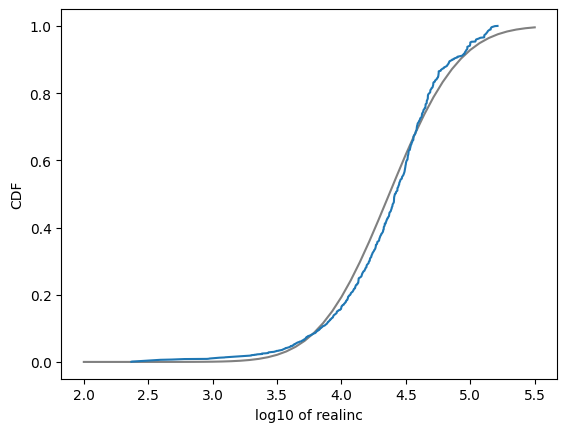

In [18]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')

Text(0, 0.5, 'CDF')

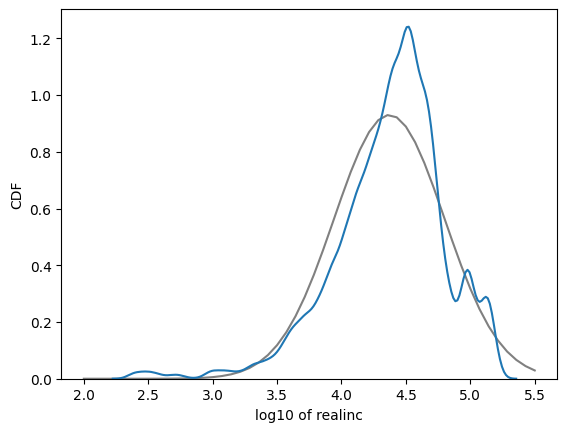

In [19]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model CDF
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf
from scipy.stats import linregress
import statsmodels.formula.api as smf

In [21]:
brfss_original = pd.read_hdf('brfss.hdf5', 'brfss')

In [22]:
# Run regression with linregress
subset = brfss_original.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=brfss_original).fit()
print(results.params)

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332, intercept_stderr=0.013196467544093602)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


In [23]:
gss = pd.read_hdf('gss.hdf5', 'gss')

Text(0, 0.5, 'Income (1986 $)')

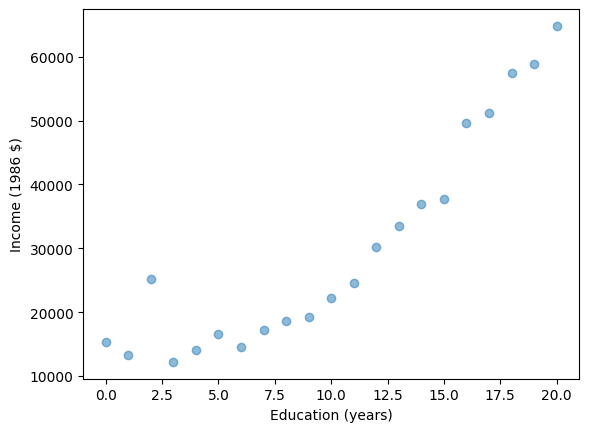

In [24]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')

In [25]:
gss['age2'] = gss['age'] ** 2

In [26]:
# Add a new column with educ squared
gss['educ2'] = gss['educ'] ** 2

# Run a regression model with educ, educ2, age and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


In [27]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ'] ** 2
df['age2'] = df['age'] ** 2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


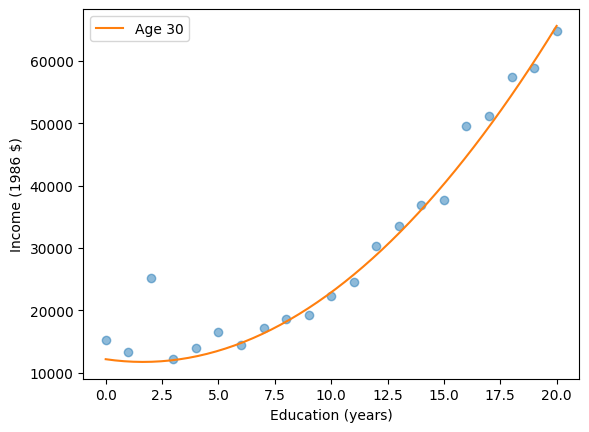

In [28]:
# Plot mean income in each age group
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6
Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64


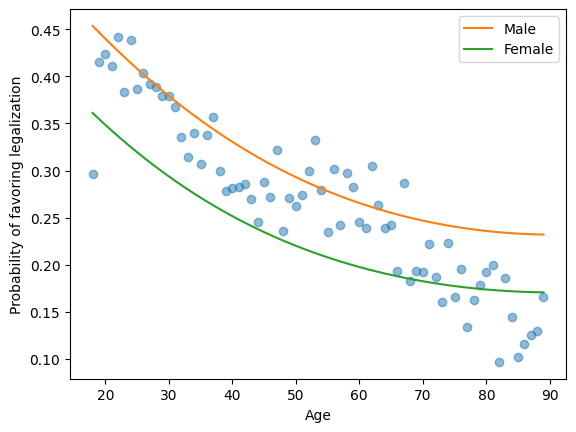

In [29]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
print(results.params)

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age'] ** 2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ'] ** 2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')

In [32]:
# Display the number of rows and columns
print(nsfg.shape)

# Display the names of the columns
print(nsfg.columns)

# Select columns birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head(5))

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


In [33]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [34]:
# replace the value 8 with NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [35]:
nsfg['agecon'].describe()

count    9358.000000
mean     2446.330199
std       579.392363
min       750.000000
25%      1983.000000
50%      2366.000000
75%      2850.000000
max      4350.000000
Name: agecon, dtype: float64

In [36]:
nsfg['agepreg'].describe()

count    9109.000000
mean     2494.934570
std       578.099231
min       825.000000
25%      2041.000000
50%      2416.000000
75%      2900.000000
max      4350.000000
Name: agepreg, dtype: float64

In [37]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


Text(0, 0.5, 'Number of pregnancies')

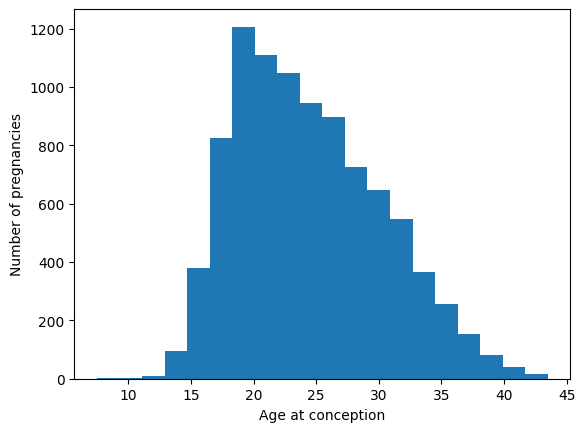

In [38]:
# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel("Age at conception")
plt.ylabel('Number of pregnancies')

Text(0, 0.5, 'Number of pregnancies')

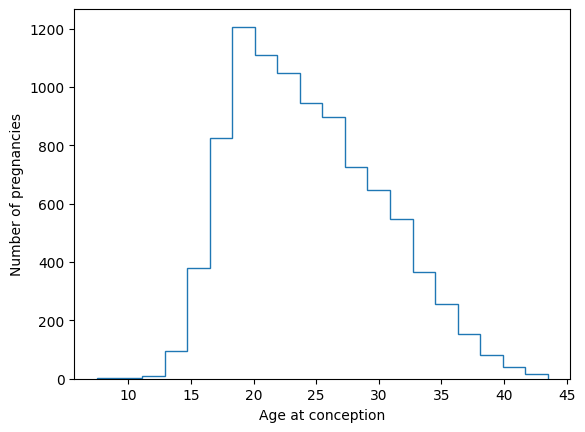

In [39]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel("Age at conception")
plt.ylabel('Number of pregnancies')

In [40]:
def resample_rows_weighted(df, column='wgt2013_2015'):
    """Resamples a DataFrame using probabilities proportional to given column.
    Args:
        df: DataFrame
        column: string column name to use as weights
    returns: 
        DataFrame
    """
    weights = df[column].copy()
    weights /= sum(weights)
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

In [41]:
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [42]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.432401344894709


In [43]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single birth
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.44357855361596
Multiple full-term mean: 5.736486486486487


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf

In [45]:
pip install empiricaldist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
pip install table

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for table: filename=table-0.0.4-py3-none-any.whl size=3810 sha256=f7c4fd819db84fb31a0bfea9419a1b8bfdc375bf8d201d7cc979c2a7ea8ea9c7
  Stored in directory: /root/.cache/pip/wheels/3b/af/22/4b0f49deb393874cd10e844067cff6cb6b6559d15be536a117
Successfully built table


In [47]:
brfss_original = pd.read_hdf('brfss.hdf5', 'brfss')

Text(0, 0.5, 'PMF')

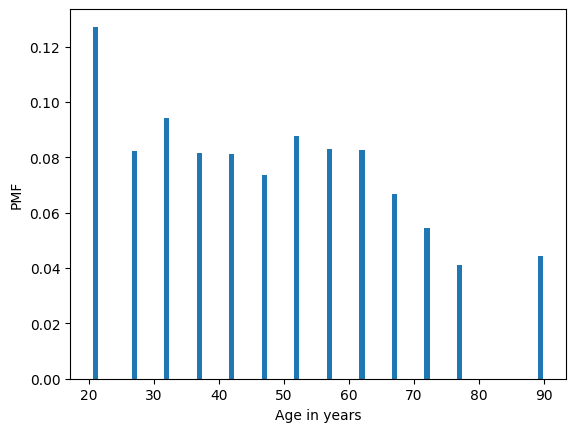

In [48]:
# Extract age
age = Pmf.from_seq(brfss_original['AGE'])

# Plot the PMF
age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')

Text(0, 0.5, 'Weight in kg')

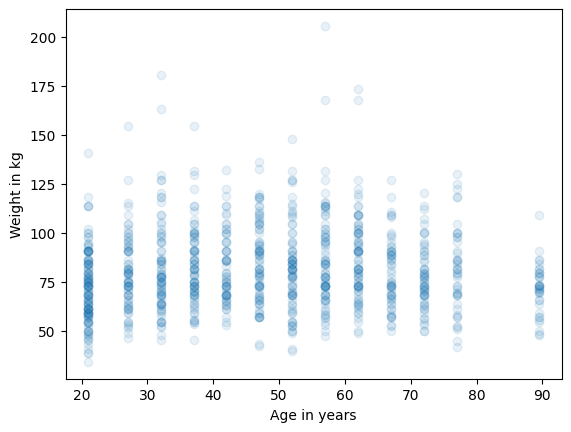

In [49]:
# Select the first 1000 respondents
brfss = brfss_original[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

Text(0, 0.5, 'Weight in kg')

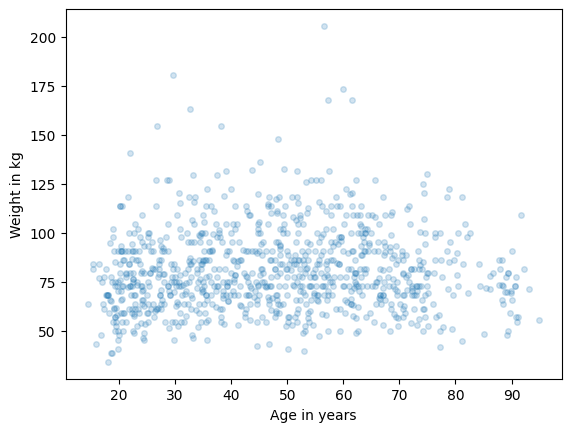

In [50]:
# Select the first 1000 respondents
brfss = brfss_original[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=4, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

Text(0, 0.5, 'Weight in kg')

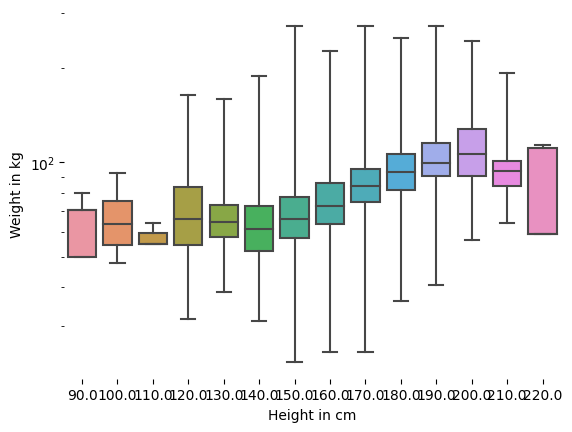

In [51]:
# Drop rows with missing data
data = brfss_original.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

Text(0, 0.5, 'PMF')

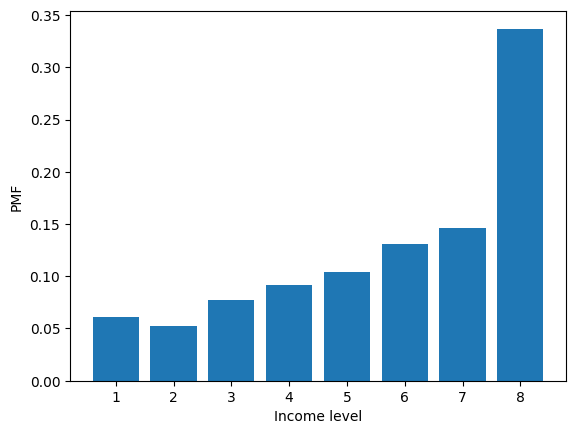

In [52]:
# Extract income
income = brfss_original['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')

Text(0, 0.5, 'Height in cm')

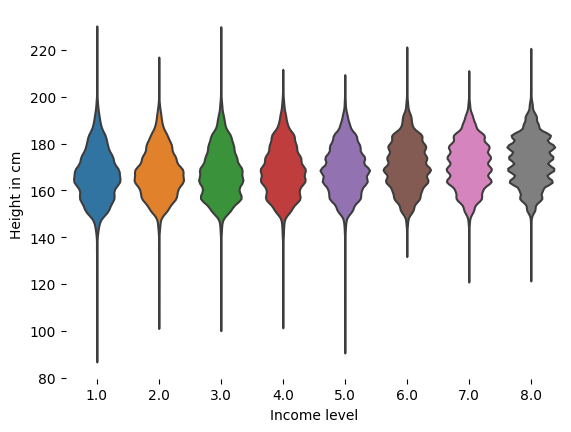

In [53]:
# Drop rows with missing data
data = brfss_original.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x = 'INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')

In [54]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss_original[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


In [55]:
from scipy.stats import linregress

In [56]:
# Extract the variables
subset = brfss_original.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332, intercept_stderr=0.013196467544093602)


(0.0, 6.0)

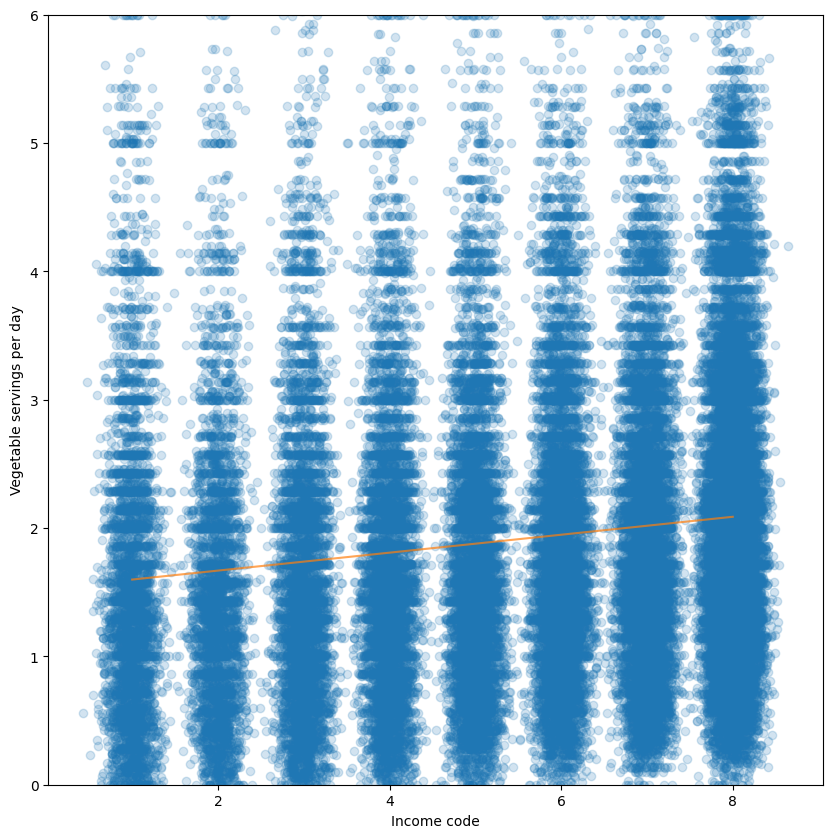

In [57]:
plt.figure(figsize=(10, 10))
# Plot the scatter plot
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])